# 2. Analyzing Hateful Memes

## Task A: Object Detection

* Apply Object Detection algorithm to identify various elements within the meme images.

* Catalog the type of the objects detected and analyse the frequency distribution in the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# dataset_dir = '/content/drive/MyDrive/iiith_interview/memes_dataset/img10'
dataset_dir = '/content/drive/MyDrive/iiith_interview/memes_dataset/img'

In [3]:
png_count = 0
for filename in os.listdir(dataset_dir):
    if filename.endswith('.png'):
        png_count += 1
print(png_count)

12169


In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16982, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 16982 (delta 90), reused 108 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (16982/16982), 15.72 MiB | 24.21 MiB/s, done.
Resolving deltas: 100% (11623/11623), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


In [5]:
import glob
from IPython.display import Image, display

In [6]:
image_paths = glob.glob(os.path.join(dataset_dir, '*.png'))

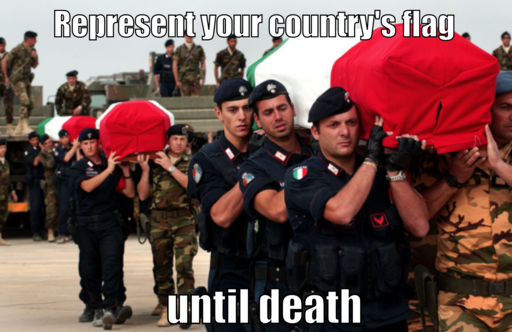

In [7]:
sample_image = image_paths[0]
display(Image(filename=sample_image))

In [8]:
import torch
from pathlib import Path

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-13 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 215MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [10]:
# output_dir = '/content/drive/MyDrive/iiith_interview/task_a/img_10_results/all'
output_dir = '/content/drive/MyDrive/iiith_interview/task_a/img_results/all'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
detections = []
for img_path in image_paths:
    results = model(img_path)
    detections.append(results.pandas().xyxy[0])
    results.save(save_dir=output_dir)

Streaming output truncated to the last 5000 lines.
  with amp.autocast(autocast):
Saved 1 image to /content/drive/MyDrive/iiith_interview/task_a/img_results/all1174
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to /content/drive/MyDrive/iiith_interview/task_a/img_results/all1175
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to /content/drive/MyDrive/iiith_interview/task_a/img_results/all1176
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autoc

In [ ]:
import pandas as pd

In [ ]:
all_detections = pd.concat(detections, ignore_index=True)

<ipython-input-12-74032b712652>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_detections = pd.concat(detections, ignore_index=True)


In [ ]:
object_counts = all_detections['name'].value_counts()

In [ ]:
print(object_counts)

name
person        11
sheep          9
bear           1
tie            1
teddy bear     1
dog            1
Name: count, dtype: int64


In [ ]:
output_csv = os.path.join(output_dir, 'img_10_results.csv')
all_detections.to_csv(output_csv, index=False)
print(f"Object detection complete. Results saved to {output_csv}")

Object detection complete. Results saved to /content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/img_10_results.csv


In [ ]:
counts_df = object_counts.reset_index()
counts_df.columns = ['Object Name', 'Count']
counts_csv = os.path.join(output_dir, 'object_counts.csv')
counts_df.to_csv(counts_csv, index=False)
print(f"Object counts saved to {counts_csv}")

Object counts saved to /content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/object_counts.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
object_counts = all_detections['name'].value_counts().reset_index()
object_counts.columns = ['Object Name', 'Count']

In [ ]:
print("Frequency of Detected Objects:")
print(object_counts)

Frequency of Detected Objects:
  Object Name  Count
0      person     11
1       sheep      9
2        bear      1
3         tie      1
4  teddy bear      1
5         dog      1


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=object_counts, x='Object Name', y='Count', palette='viridis')
plt.title('Distribution of Detected Objects')
plt.xlabel('Object Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plot_path = os.path.join(output_dir, 'object_distribution.png')
plt.savefig(plot_path)
plt.show()

<ipython-input-20-de164a32d3e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=object_counts, x='Object Name', y='Count', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

In [ ]:
object_counts['Percentage'] = (object_counts['Count'] / object_counts['Count'].sum()) * 100
print("\nPercentage Distribution of Detected Objects:")
print(object_counts)


Percentage Distribution of Detected Objects:
  Object Name  Count  Percentage
0      person     11   45.833333
1       sheep      9   37.500000
2        bear      1    4.166667
3         tie      1    4.166667
4  teddy bear      1    4.166667
5         dog      1    4.166667


In [ ]:
frequency_csv = os.path.join(output_dir, 'object_frequency_distribution.csv')
object_counts.to_csv(frequency_csv, index=False)
print(f"Frequency distribution saved to {frequency_csv}")

Frequency distribution saved to /content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/object_frequency_distribution.csv


In [ ]:
import pandas as pd
object_counts_csv = '/content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/object_counts.csv'
object_counts_df = pd.read_csv(object_counts_csv)
print("Original Data:")
print(object_counts_df.head())

Original Data:
  Object Name  Count
0      person     11
1       sheep      9
2        bear      1
3         tie      1
4  teddy bear      1


In [ ]:
def assign_toxicity(object_name):
    toxic_objects = ['weapon', 'knife', 'gun', 'bomb', 'skull', 'drugs', 'alcohol', 'cigarette', 'violence', 'blood', 'tie', 'sheep']
    if object_name.lower() in toxic_objects:
        return 1
    else:
        return 0

object_counts_df['toxicity'] = object_counts_df['Object Name'].apply(assign_toxicity)
output_csv = '/content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/object_counts_toxic.csv'
object_counts_df.to_csv(output_csv, index=False)
print(f"Updated object counts with toxicity labels saved to {output_csv}")
print("Updated Data with Toxicity Labels:")
print(object_counts_df.head())

Updated object counts with toxicity labels saved to /content/drive/MyDrive/iiith_interview/task_a/img_10_results/all/object_counts_toxic.csv
Updated Data with Toxicity Labels:
  Object Name  Count  toxicity
0      person     11         0
1       sheep      9         1
2        bear      1         0
3         tie      1         1
4  teddy bear      1         0


In [ ]:
import os
import shutil

base_dir = '/content/drive/MyDrive/iiith_interview/task_a/img_10_results/'
destination_dir = os.path.join(base_dir, 'all')
os.makedirs(destination_dir, exist_ok=True)
for i in range(2, 12):
    sub_dir = os.path.join(base_dir, f'all{i}')
    if os.path.exists(sub_dir):
        for filename in os.listdir(sub_dir):
            file_path = os.path.join(sub_dir, filename)
            if os.path.isfile(file_path):
                shutil.copy(file_path, destination_dir)
print("All images have been copied to the 'all' directory.")

All images have been copied to the 'all' directory.


## Task B: Caption Impact Assessment

* We have to determine whether or not the text overlay is influence the object detection process.


In [ ]:
import os
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from google.colab import drive

drive.mount('/content/drive')
dataset_dir = '/content/drive/MyDrive/iiith_interview/memes_dataset/img10'
output_dir = '/content/drive/MyDrive/iiith_interview/task_b/img_10_results'
os.makedirs(output_dir, exist_ok=True)

!apt-get install tesseract-ocr
!pip install pytesseract opencv-python-headless

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def remove_captions(image_path):
    img = cv2.imread(image_path)
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(d['text'])
    mask = np.zeros_like(img)

    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            mask = cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)
    inpainted_img = cv2.inpaint(img, cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY), 7, cv2.INPAINT_TELEA)

    return inpainted_img, img

def compare_detection(image_path):
    results_orig = model(image_path)
    objects_orig = results_orig.pandas().xyxy[0]
    inpainted_img, orig_img = remove_captions(image_path)
    results_inpaint = model(inpainted_img)
    objects_inpaint = results_inpaint.pandas().xyxy[0]
    num_objects_orig = len(objects_orig)
    num_objects_inpaint = len(objects_inpaint)
    mean_conf_orig = objects_orig['confidence'].mean() if num_objects_orig > 0 else 0
    mean_conf_inpaint = objects_inpaint['confidence'].mean() if num_objects_inpaint > 0 else 0

    return {
        'image_path': image_path,
        'num_objects_orig': num_objects_orig,
        'num_objects_inpaint': num_objects_inpaint,
        'mean_conf_orig': mean_conf_orig,
        'mean_conf_inpaint': mean_conf_inpaint
    }

results = []

image_paths = [os.path.join(dataset_dir, img) for img in os.listdir(dataset_dir) if img.endswith(('.jpg', '.png'))]

for image_path in image_paths:
    result = compare_detection(image_path)
    results.append(result)

df = pd.DataFrame(results)
output_csv = os.path.join(output_dir, 'caption_impact_assessment_results.csv')
df.to_csv(output_csv, index=False)

print(f"Results saved to {output_csv}")

summary = {
    'Total images': len(df),
    'Avg objects in original': df['num_objects_orig'].mean(),
    'Avg objects after inpainting': df['num_objects_inpaint'].mean(),
    'Avg confidence in original': df['mean_conf_orig'].mean(),
    'Avg confidence after inpainting': df['mean_conf_inpaint'].mean(),
    'Total objects lost due to captions': (df['num_objects_orig'] - df['num_objects_inpaint']).sum()
}

for key, value in summary.items():
    print(f"{key}: {value}")

summary_path = os.path.join(output_dir, 'summary_report.txt')
with open(summary_path, 'w') as f:
    for key, value in summary.items():
        f.write(f"{key}: {value}\n")

print(f"Summary report saved to {summary_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-7 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning:

Results saved to /content/drive/MyDrive/iiith_interview/task_b/img_10_results/caption_impact_assessment_results.csv
Total images: 10
Avg objects in original: 2.4
Avg objects after inpainting: 1.5
Avg confidence in original: 0.5227694007257621
Avg confidence after inpainting: 0.2713520568278101
Total objects lost due to captions: 9
Summary report saved to /content/drive/MyDrive/iiith_interview/task_b/img_10_results/summary_report.txt


## Task C: Classification System Development

* We have to develop a system that classify the images based on something non-trivial. We are free to choose any system.
* Since the given dataset is already too large, I am not considering any other dataset in the give task.
* System on which I want to classify the dataset - I am using binary classification methodology. If the given meme is a having atleast 1 person, then it will be to one class. On the other hand, if a given meme does not have a single person. Then, it will belong to the second class.

In [ ]:
import os
import torch
import pandas as pd
from google.colab import drive
from sklearn.metrics import classification_report, accuracy_score
drive.mount('/content/drive')
dataset_dir = '/content/drive/MyDrive/iiith_interview/memes_dataset/img10'
output_dir = '/content/drive/MyDrive/iiith_interview/task_c/img_10_results'
os.makedirs(output_dir, exist_ok=True)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
def classify_image(image_path):
    results = model(image_path)
    detections = results.pandas().xyxy[0]
    person_detections = detections[detections['name'] == 'person']
    if any(person_detections['confidence'] > 0.5):
        return 1
    else:
        return 2

classification_results = []

image_paths = [os.path.join(dataset_dir, img) for img in os.listdir(dataset_dir) if img.endswith(('.jpg', '.png'))]

for image_path in image_paths:
    classification = classify_image(image_path)
    classification_results.append({
        'image_path': image_path,
        'classification': classification
    })
df = pd.DataFrame(classification_results)
output_csv = os.path.join(output_dir, 'classification_results.csv')
df.to_csv(output_csv, index=False)

print(f"Classification results saved to {output_csv}")

true_labels = []
for image_path in image_paths:
    results = model(image_path)
    detections = results.pandas().xyxy[0]
    person_detections = detections[detections['name'] == 'person']

    if any(person_detections['confidence'] > 0.5):
        true_labels.append(1)
    else:
        true_labels.append(2)

predicted_labels = df['classification'].tolist()
accuracy = accuracy_score(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=['Class 1: Person Detected', 'Class 2: No Person Detected'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-7 Python-3.10.12 torch-2.4.1+cu121 CPU



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocas

Classification results saved to /content/drive/MyDrive/iiith_interview/task_c/img_10_results/classification_results.csv


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Accuracy: 1.00
Classification Report:
                             precision    recall  f1-score   support

   Class 1: Person Detected       1.00      1.00      1.00         5
Class 2: No Person Detected       1.00      1.00      1.00         5

                   accuracy                           1.00        10
                  macro avg       1.00      1.00      1.00        10
               weighted avg       1.00      1.00      1.00        10



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

true_labels = []
features = []

for image_path in image_paths:
    results = model(image_path)
    detections = results.pandas().xyxy[0]
    person_detections = detections[detections['name'] == 'person']

    if any(person_detections['confidence'] > 0.5):
        true_labels.append(1)
    else:
        true_labels.append(2)

    if not person_detections.empty:
        mean_confidence = person_detections['confidence'].mean()
    else:
        mean_confidence = 0
    features.append([mean_confidence])

features = pd.DataFrame(features, columns=['mean_confidence'])

X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.2, random_state=42)

classifier = make_pipeline(StandardScaler(), LogisticRegression())
classifier.fit(X_train, y_train)
predicted_labels = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)
report = classification_report(y_test, predicted_labels, target_names=['Class 1: Person Detected', 'Class 2: No Person Detected'])
report_file = os.path.join(output_dir, 'classification_report.txt')
with open(report_file, 'w') as f:
    f.write(f"Accuracy: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print(f"Classification report saved to {report_file}")


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

Accuracy: 1.00
Classification Report:
                             precision    recall  f1-score   support

   Class 1: Person Detected       1.00      1.00      1.00         1
Class 2: No Person Detected       1.00      1.00      1.00         1

                   accuracy                           1.00         2
                  macro avg       1.00      1.00      1.00         2
               weighted avg       1.00      1.00      1.00         2

Classification report saved to /content/drive/MyDrive/iiith_interview/task_c/img_10_results/classification_report.txt
